In [2]:
import pandas as pd 
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('data/drugsComTrain_raw.tsv', sep='\t')

In [4]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [5]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [6]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') |(df['condition']=='High Blood Pressure')| (df['condition']=='Diabetes, Type 2')]

In [7]:
df.shape

(161297, 7)

In [8]:
df_train.shape

(42732, 7)

In [9]:
X = df_train.drop(['Unnamed: 0', 'drugName', 'rating', 'date', 'usefulCount'], axis=1)

****Data Analysis****

In [10]:
X.condition.value_counts()

condition
Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: count, dtype: int64

In [11]:
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

In [18]:
X_birth = X[(X['condition']=='Birth Control')]
X_dep = X[(X['condition']=='Depression')]
X_bp = X[(X['condition']=='High Blood Pressure')]
X_diab = X[(X['condition']=='Diabetes, Type 2')]

In [13]:
X_birth.review

2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
9         "I had been on the pill for many years. When m...
14        "Started Nexplanon 2 months ago because I have...
22        "Nexplanon does its job. I can have worry free...
59        "Never again! After being on depo I was suppos...
61        "I was put on Yasmin for 6 months to regulate ...
63        "I have been on this for 8 months and sad to s...
64        "I was off birth control for a while consideri...
68                         "it caused me to gain 30 pounds"
74        "My experience during the nexplon is great not...
75        "I&#039;ve had mine for over a year and notice...
77        "I am always bleeding between periods, I&rsquo...
82        "I have been on pills for years, and in 2012 I...
83        "I had the Mirena put in almost a year ago. In...
90        "This medicine is absolutely terrible. After t...
97        "I am torn by the Nuvaring. Th

Text(0.5, 1.0, 'Word Cloud for Birth Control')

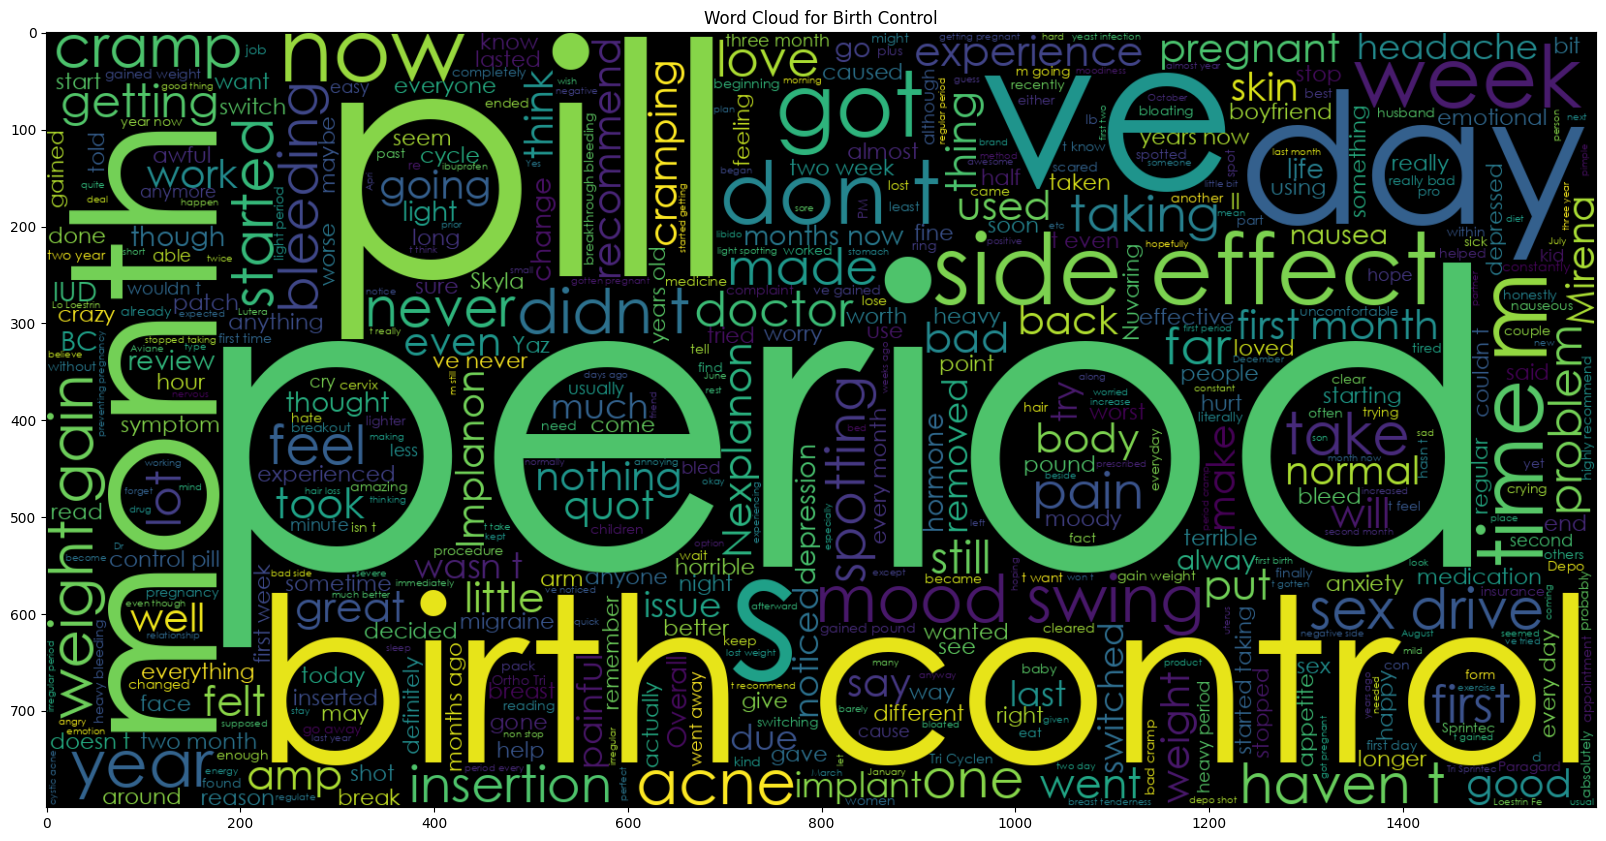

In [15]:
from wordcloud import WordCloud
plt.figure(figsize =(20,20))
font_path = 'data/font.ttf'
wc = WordCloud(max_words = 500, width = 1600, height = 800, font_path=font_path).generate(" ".join(X_birth.review))
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud for Birth Control", fontsize=12)

Text(0.5, 1.0, 'Word Cloud for Diabetes')

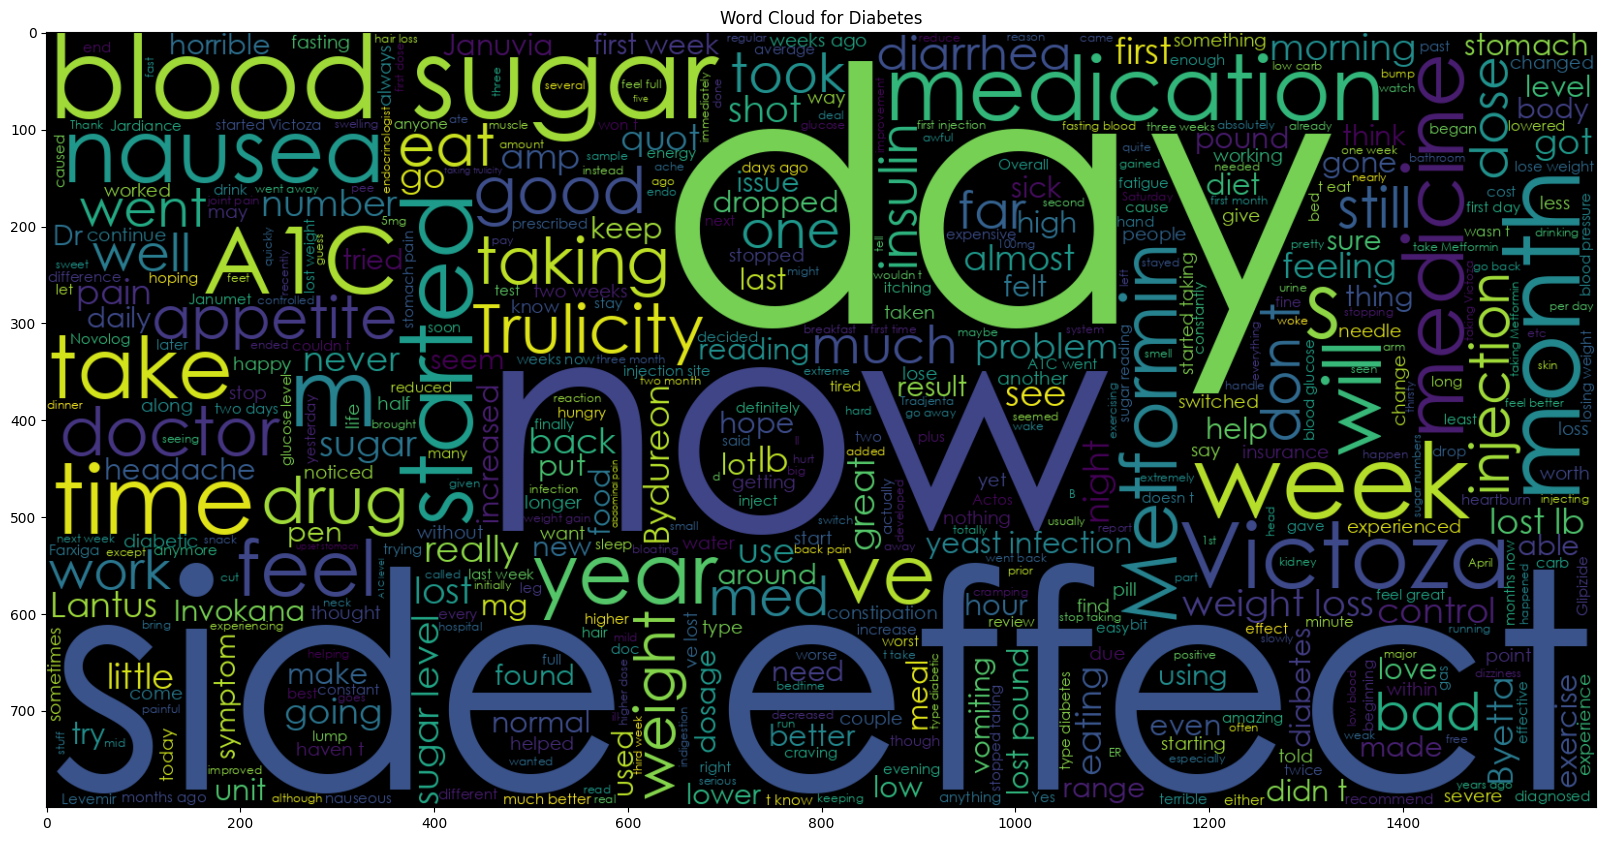

In [16]:
from wordcloud import WordCloud
plt.figure(figsize =(20,20))
font_path = 'data/font.ttf'
wc = WordCloud(max_words = 500, width = 1600, height = 800, font_path=font_path).generate(" ".join(X_diab.review))
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud for Diabetes", fontsize=12)

Text(0.5, 1.0, 'Word Cloud for Pressure')

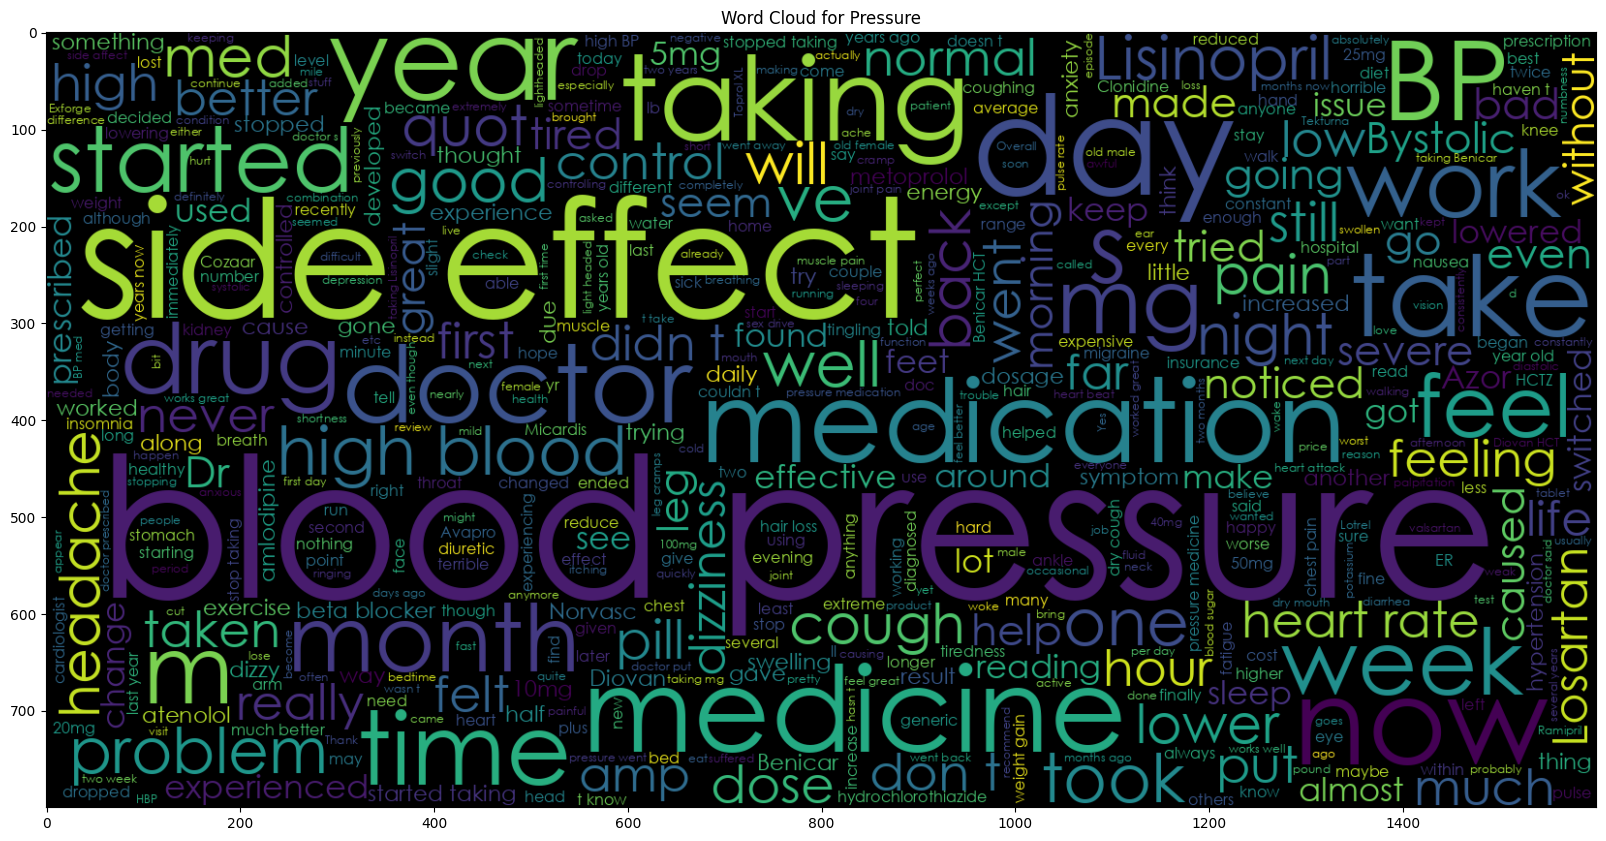

In [19]:
from wordcloud import WordCloud
plt.figure(figsize =(20,20))
font_path = 'data/font.ttf'
wc = WordCloud(max_words = 500, width = 1600, height = 800, font_path=font_path).generate(" ".join(X_bp.review))
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud for Pressure", fontsize=12)

Text(0.5, 1.0, 'Word Cloud for Depression')

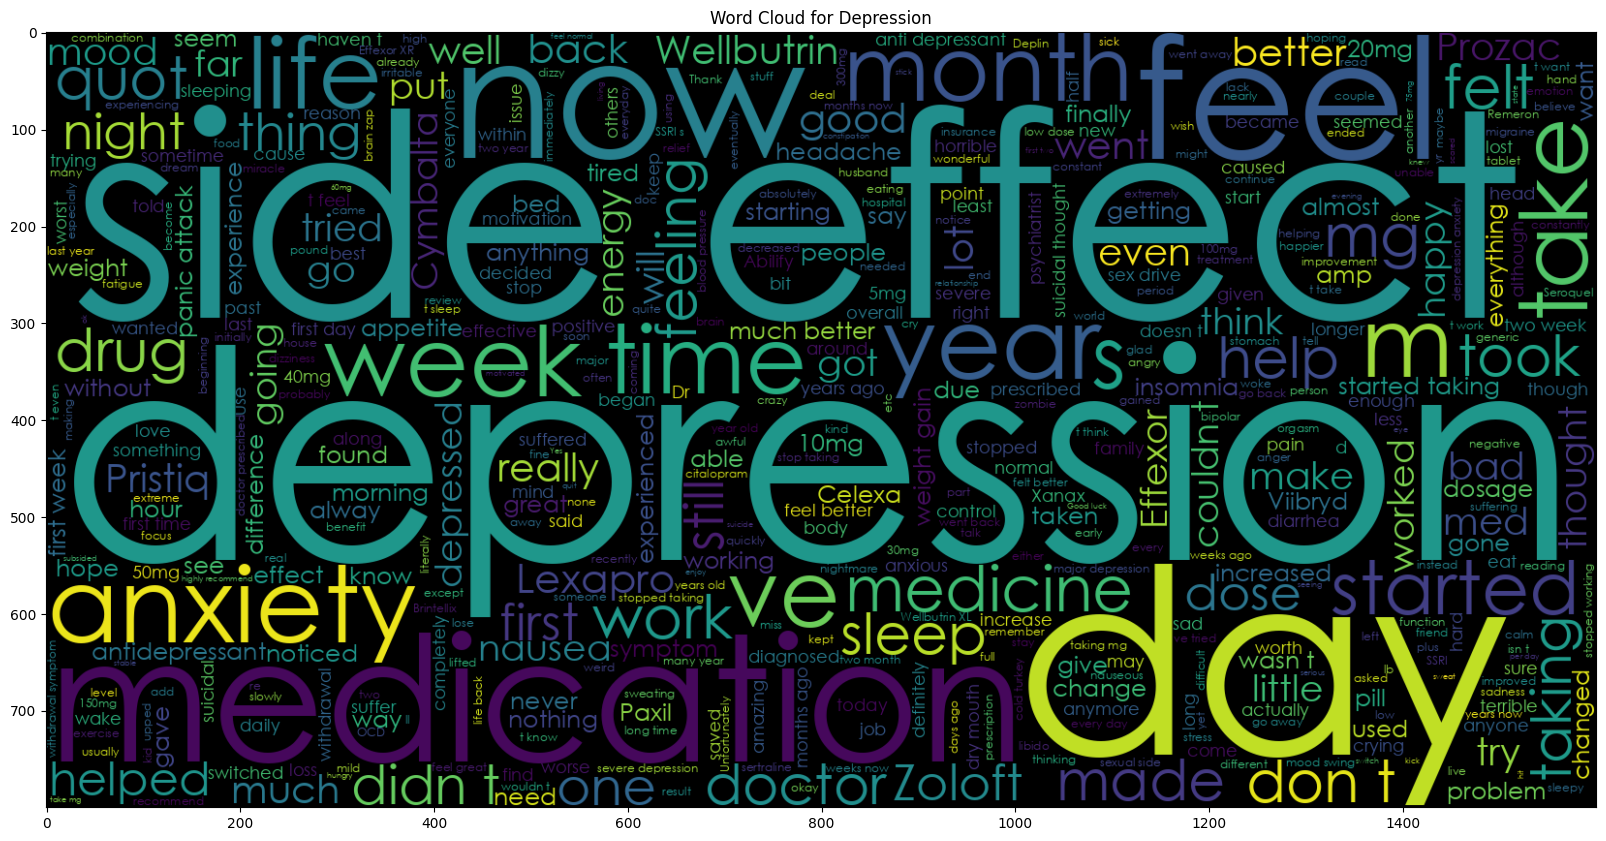

In [20]:
from wordcloud import WordCloud
plt.figure(figsize =(20,20))
font_path = 'data/font.ttf'
wc = WordCloud(max_words = 500, width = 1600, height = 800, font_path=font_path).generate(" ".join(X_dep.review))
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud for Depression", fontsize=12)

**Data Pre-processing**

In [24]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [25]:
#remove double quotes
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [26]:
X.head()

condition                                             review
2   Birth Control  I used to take another oral contraceptive, whi...
3   Birth Control  This is my first time using any form of birth ...
9   Birth Control  I had been on the pill for many years. When my...
11     Depression  I have taken anti-depressants for years, with ...
14  Birth Control  Started Nexplanon 2 months ago because I have ...

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/lahiru/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
from nltk.corpus import stopwords
stop = stopwords.words("english")

In [37]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

#lemmetizer make meaningful word
#stemming does not care about the mean
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/lahiru/nltk_data...


True

In [38]:
from bs4 import BeautifulSoup
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

X['review_clean'] = X['review'].apply(review_to_words)

#creating feature and target variable
X_feat=X['review_clean']
y=X['condition']

X.head()

/tmp/ipykernel_21607/1696986563.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


condition                                             review  \
2   Birth Control  I used to take another oral contraceptive, whi...   
3   Birth Control  This is my first time using any form of birth ...   
9   Birth Control  I had been on the pill for many years. When my...   
11     Depression  I have taken anti-depressants for years, with ...   
14  Birth Control  Started Nexplanon 2 months ago because I have ...   

                                         review_clean  
2   used take another oral contraceptive pill cycl...  
3   first time using form birth control glad went ...  
9   pill many year doctor changed rx chateal effec...  
11  taken anti depressant year improvement mostly ...  
14  started nexplanon month ago minimal amount con...

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [47]:
def plot_confusion_matrix(cm, classes, normalize=False, title="confusion Matrix", cmp= plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmp)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    thresh = cm.max()/2
    for (i, j) in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


In [41]:
count_vectorizer = CountVectorizer(stop_words="english")
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)


**Naive bayes**

accuracy:   0.970
Confusion matrix without normalization


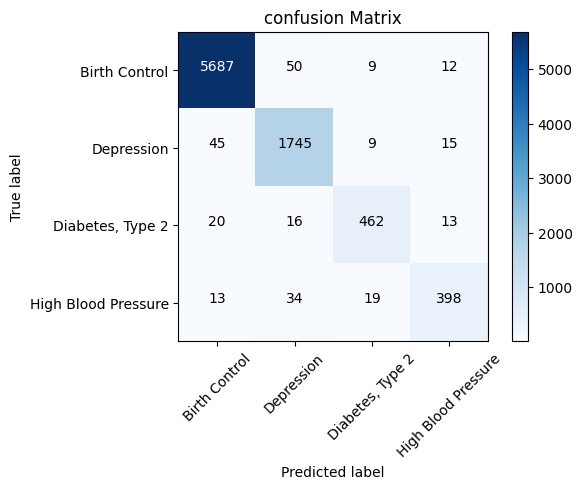

In [48]:
mnb_tf = MultinomialNB()
mnb_tf.fit(count_train, y_train)
pred = mnb_tf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

**Passive Agressive Classifier**

accuracy:   0.978
Confusion matrix without normalization


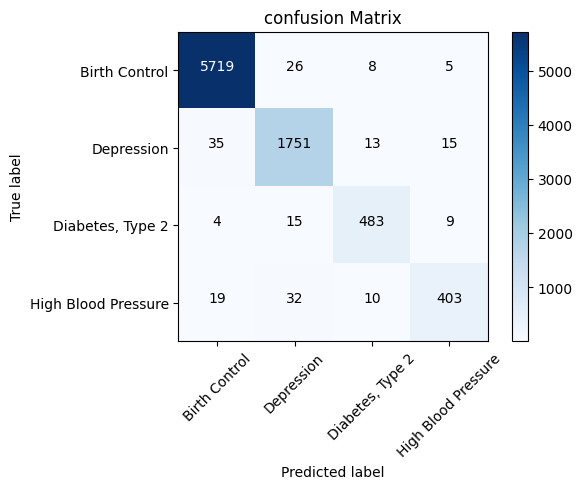

In [49]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(count_train, y_train)
pred = pass_tf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])